In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image  import load_img, img_to_array

In [3]:
#-- load model
model = tf.keras.models.load_model('C:/Users/Poon/Desktop/image processing project/model/object_detection_version1.h5')
print("loaded")


loaded


In [178]:
# -- load image
image_path = './images/Cars239.png'
image = load_img(image_path)
image = np.array(image, dtype = np.uint8)
image1 = load_img(image_path, target_size = (224,224))
image_arr = img_to_array(image1)/255.0

In [179]:
# size of original image
h,w,d = image.shape

In [180]:
#size of output image
image_arr.shape

(224, 224, 3)

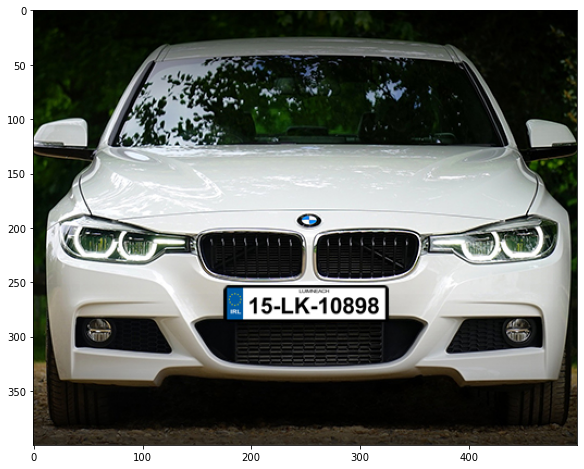

In [181]:
plt.figure(figsize = (10,8))
plt.imshow(image)
plt.show()

In [182]:
test_arr = image_arr.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [183]:
#Predication part
coords = model.predict(test_arr)
coords

array([[0.34793425, 0.62858367, 0.62587756, 0.71136475]], dtype=float32)

In [184]:
denorm = np.array([w, w, h, h])
coords = coords* denorm
coords

array([[173.96712303, 314.29183483, 250.35102367, 284.54589844]])

In [185]:
coords = coords.astype(np.int32)
coords

array([[173, 314, 250, 284]])

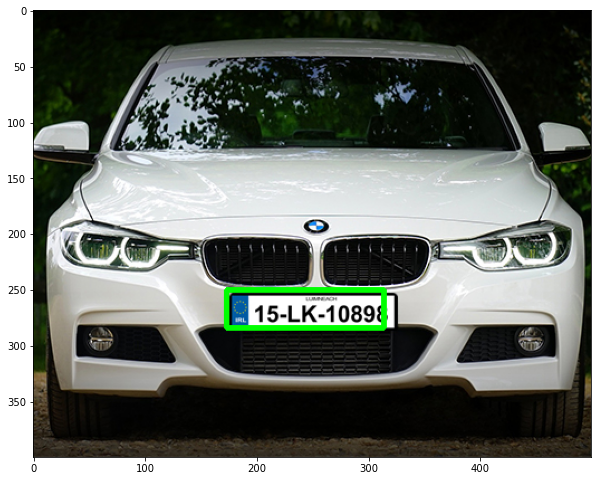

In [186]:
# drawing box on image
xmin ,xmax,ymin,ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
cv2.rectangle(image, pt1, pt2,(0,255,0),3)

plt.figure(figsize = (10,10))
plt.imshow(image)
plt.show()

In [187]:
# Create pipeline
def object_detection(image_path) :
    # -- load image
    image = load_img(image_path)
    image = np.array(image, dtype = np.uint8)
    # -- data preprocessing
    image1 = load_img(image_path, target_size = (224,224))
    image_arr = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = image_arr.reshape(1,224,224,3)
    # make predications 
    coords = model.predict(test_arr)
    # -- denormalize
    denorm = np.array([w, w, h, h])
    coords = coords* denorm
    coords = coords.astype(np.int32)
    # -- draw 
    xmin ,xmax,ymin,ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    cv2.rectangle(image, pt1, pt2,(0,255,0),3)
    return image, coords
    

In [188]:
#image_path = 'C:/Users/Poon/images/Cars1.png'
img,cords =  object_detection(image_path)

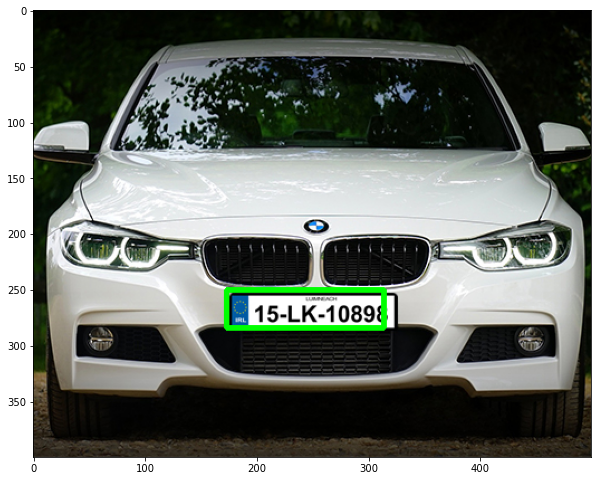

In [189]:
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

In [190]:
## OCR
import pytesseract as pt
pt.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

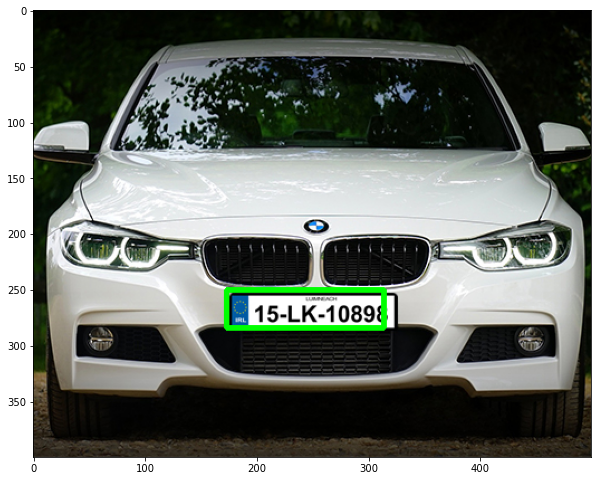

array([[173, 314, 250, 284]])

In [191]:
#image_path = 'C:/Users/Poon/images/Cars1.png'
img,cords =  object_detection(image_path)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()
cords

In [192]:
img_array = np.array (load_img(image_path))
xmin, xmax, ymin, ymax = cords[0]
roi = img_array[ymin:ymax, xmin:xmax]
print(roi)

[[[222 221 216]
  [227 226 222]
  [234 233 231]
  ...
  [184 182 196]
  [182 184 199]
  [193 193 205]]

 [[198 195 186]
  [201 196 190]
  [201 196 192]
  ...
  [255 255 255]
  [255 255 251]
  [255 255 253]]

 [[205 201 192]
  [205 201 192]
  [203 199 190]
  ...
  [234 233 231]
  [233 228 232]
  [230 228 233]]

 ...

 [[108  96  80]
  [104  95  78]
  [  8   7   5]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[108 101  85]
  [108 100  87]
  [  7   7   5]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 85  78  68]
  [ 86  79  69]
  [  8   8   6]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


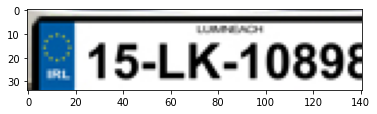

I 15-LK 089$




In [193]:
import imutils as im
#roi_rotate = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(roi)
plt.show()
text =  pt.image_to_string(roi)
print(text)